<center><h1>Analysis of NFL Quarterback Draft Data</h1>
 <h2>by Evan Watson, Jake Plazony, Camryn Carty, Kenneth Gillum</h2> </center>

<center><h2>Data collection and extraction</h2></center>
<p>
The website we used to grab the NFL draft data is the [Pro Football Reference](https://www.pro-football-reference.com/draft/) website which has the option to go through each draft year by year dating back to 1936.
</p>
<p>
To get the quarterbacks for each draft year we passed a range of iterable years to https://www.pro-football-reference.com/years/2017/draft.htm where we changed the year for each parse. We then used beautifulsoup and an if statement to take only players in the draft with a position of QB. Each player link was passed to a list to be used for grabbing player specific data. 
</p>

<p>
After getting the quarterback links from the draft years specified into a list, we used beautifulsoup again to iterate through each player link into the url https://www.pro-football-reference.com/players/T/TrubMi00.htm where the last part is switched with the player specific link. After looking at the html of the parse we found where the player specific data was like player's total yards, height, and age. 
</p>

<p>
After parsing and cleaning the data we took out outliers like players who never played a game in their career. We also found player age using python since the website only had birthdate. Another thing we accounted for was players who may have played more years than others leading to inconsistent data, specifically with total passing yards each year. We took each player's yearly amount, summed the data points together, and found the total average career passing yards to make the data more consistent. We also ran a loop to take out players who had zero overall passing yards to eliminate players who haven't played a game.    
</p>
<p>
For the player height parse, we used beautifulsoup to find the span tag that consisted of the attribute’s itemprop and height in the html. After grabbing the height, we used python to split the tags from the data we needed and multiplied by twelve to get player height in inches. 
</p> 
<p>
Additionally, we parsed the QB name to identify each datapoint we grabbed. To do this we used beautifulsoup to find all the h1 tags with attributes itemprop and name. We then split the information we got back to remove the tags around the data.
</p>
<p>
To get the player age we used beautifulsoup to find the span tags with attributes itemprop and birthdate. We split the tags off the player birthdates and ran the values into a for loop to find the age based on the current computer date.
</p>



<center><h1>Data analysis</h1>

In [15]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from datetime import date

list_draft=[]
list_players = []
newlist=[]
QB=[]
begin_year, end_year = 2011, 2020


for year in range (begin_year, end_year, 1):
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    ##Here we parsed the draft data into an html file. 
    url = 'https://www.pro-football-reference.com//years/'+str(year)+'/draft.htm'
    print ('#Download file :', url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
   
  
    ##We used beautifulsoup to find all of the players in the html and specifically the QB position. 
    soup = BeautifulSoup(html, 'lxml')
    player = soup.find_all('td', attrs={'data-stat' : 'player'})
    draftPlayer = soup.find_all('td', attrs={'data-stat' : 'pos'})
    
    for i in draftPlayer:
        tt = format(str(i))
        aa= tt.split('>')
        list_draft.append(aa[1])
        
      
    for row in player:
        col = row.find_all('a')
        newy = format(str(col))
        newplayer= newy.split('"')
        x = newplayer
        #print(x[1])
        list_players.append((x[1]))
    merged_list = list(map(lambda x, y:(x,y), list_players, list_draft))
    #merged_list = tuple(zip(list_players, list_draft))  
    for i in merged_list:
        
        if "QB" in i[1]:
            newlist.append(i)
    for i in newlist:
        QB.append(i[0])
        QB = list(dict.fromkeys(QB))
        
    print(QB)
    
    ##Here we parsed again to grab information on the nfl draft players    
def download_and_parse_draft (player_url):
  
    tmp = random.random()*3.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)
    url = 'https://www.pro-football-reference.com/'+str(player_url)
   
    #Displays what the link is
    print ('#Download link :', url)
   
    #Recommended using Mozilla/5.0 in class
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
   
    #Reads the HTML from the url we semt a request to
    html = urlopen(req).read()

    ##Saved a player's HTML to a file.

    f = open('player.html','w')
    f.write(html.decode('utf-8'))
    f.close()
 
    ##Used beautifulsoup again to get the player's names, age, and heights. 
    soup = BeautifulSoup(html, 'lxml')
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    player = name.get_text()
    
     #QB Height Parse
    heightList=[]
    secondHeightList=[]
    height = soup.find_all('span', attrs={'itemprop' : 'height'})
    heightSplit = format(str(height))
    newHeight= heightSplit.split('</span>')
    heightList.append(newHeight[0])
    for i in heightList:
        secondHeight = i.split(">")
    secondHeightList.append(secondHeight[1])
    heightDone = "".join(secondHeightList)
    print(heightDone)
    
    heightInchesLst = []
    heightInches = 0
    
    if len(heightDone) == 3:
        heightInches = (12 * int(heightDone[0])) + int(heightDone[2])
    elif len(heightDone) == 4:
        heightInches = (12 * int(heightDone[0])) + (10 + int(heightDone[3]))
    

    #QB Name Parse
    nameList=[]
    secondNameList=[]
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    nameSplit = format(str(name))
    newName= nameSplit.split('</h1>')
    nameList.append(newName[0])
    for i in nameList:
        secondName = i.split(">")
    secondNameList.append(secondName[1])
    nameDone = "".join(secondNameList)
    #print(nameDone)
   
    
    
    #QB Age Parse
    ageList=[]
    secondAgeList=[]
    age = soup.find('span', attrs={'itemprop' : 'birthDate'})
    ageSplit = format(str(age))
    newAge= ageSplit.split('data-birth="')
    ageList.append(newAge[1])
    for i in ageList:
        secondAge = i.split('" id')
    secondAgeList.append(secondAge[0])
    ageDone = "".join(secondAgeList)
    #print(ageDone)
   
    passingYards = soup.find_all('td', attrs={'data-stat' : 'pass_yds'})
    
    count = 1
    
    ad = []
    numbers = {}
    
    for i in passingYards:
        newPY = format(str(i))
        spnewPY = newPY.split(">")
        for j in spnewPY:
            spJ = j.split("<")
            ad += spJ
        for j in ad:
            if j. isdigit():
                numbers[int(j)] = 0
    print(numbers)
    
    numbersMinusMax = {}
    
    for i in numbers:
        if numbers != {}:
            if i != max(numbers):
                if i != 0:
                    numbersMinusMax[i] = 0
    avg = findAverage(numbersMinusMax)
    print([avg, nameDone, heightInches, ageDone])

    return [avg, nameDone, heightInches, ageDone]
    

Sleep for  3.634140376756772  seconds
#Download file : https://www.pro-football-reference.com//years/2011/draft.htm
['/players/D/DaltAn00.htm', '/players/N/NewtCa00.htm', '/players/Y/YateT.00.htm', '/players/T/TaylTy00.htm', '/players/L/LockJa00.htm', '/players/M/McElGr00.htm', '/players/P/PryoTe00.htm', '/players/G/GabbBl00.htm', '/players/S/StanRi00.htm', '/players/P/PondCh00.htm', '/players/K/KaepCo00.htm', '/players/M/MallRy00.htm', '/players/E/EndeNa00.htm']
Sleep for  1.9757577928276115  seconds
#Download file : https://www.pro-football-reference.com//years/2012/draft.htm
['/players/C/ColeB.00.htm', '/players/Y/YateT.00.htm', '/players/N/NewtCa00.htm', '/players/L/LindRy00.htm', '/players/T/TaylTy00.htm', '/players/M/McElGr00.htm', '/players/C/CousKi00.htm', '/players/O/OsweBr00.htm', '/players/G/GabbBl00.htm', '/players/K/KaepCo00.htm', '/players/F/FoleNi00.htm', '/players/E/EndeNa00.htm', '/players/D/DaltAn00.htm', '/players/L/LuckAn00.htm', '/players/H/HarnCh00.htm', '/players

<center><h2>Scatter Plot #1- Height vs. Total Average Passing Yards
</h2>
For the first scatter plot, height vs. total average passing yards, we plotted the height on the x-axis and average passing yards on the y-axis. After getting the data using beautifulsoup, we plotted each point for the past 9 years of NFL Drafts, specifically the QB position. The scatterplot is in blue as well as the linear regression line which is plotted below. Before the graph displays the QB players dataset being collected from the crawler. 

Sleep for  0.4553004257219142  seconds
#Download link : https://www.pro-football-reference.com//players/W/WennKe00.htm
6-3
{}
[0, 'Keith Wenning', 75, '1991-02-14']
Sleep for  1.9103584545358232  seconds
#Download link : https://www.pro-football-reference.com//players/Y/YateT.00.htm
6-4
{64: 0, 113: 0, 370: 0, 949: 0, 38: 0, 1993: 0, 2057: 0, 523: 0, 0: 0}
[578.5714285714286, 'T.J. Yates', 76, '1987-05-28']
Sleep for  2.611438251238681  seconds
#Download link : https://www.pro-football-reference.com//players/R/RenfSe00.htm
6-3
{0: 0, 11: 0}
[0, 'Sean Renfree', 75, '1990-04-28']
Sleep for  0.08776576384213663  seconds
#Download link : https://www.pro-football-reference.com//players/L/LindRy00.htm
6-3
{752: 0, 0: 0, 562: 0, 58: 0, 1372: 0, 1314: 0}
[671.5, 'Ryan Lindley', 75, '1989-06-02']
Sleep for  0.3851778829349415  seconds
#Download link : https://www.pro-football-reference.com//players/M/McElGr00.htm
6-2
{214: 0}
[0, 'Greg McElroy', 74, '1988-05-10']
Sleep for  2.370070101642159  s

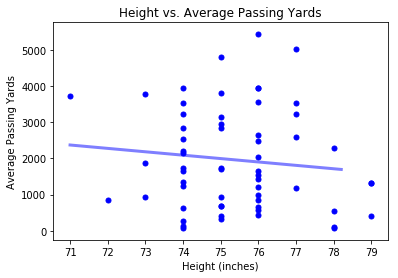

In [17]:
def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    #print(avg)
    return avg

def average_value (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def std_deviation (x):
    av_x = average_value (x)
    if av_x != None:
        std = 0.0
        num = 0.0
        for i in range(0, len(x)):
            std += (float(x[i]) - av_x)*(float(x[i]) - av_x)
            num += 1.0
        return np.sqrt(std/num)
    return None


def second_moment (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])*float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def linear_regression (x, y):
    
    if (len(x) != len(y)):
        return None
    
    a_x =  average_value (x)
    a_y =  average_value (y)
    s_x =  std_deviation (x)
    s_y =  std_deviation (y)
    m_x =  second_moment (x)
    m_y =  second_moment (y)
    
    
    p = []
    for i in range(0, len(x)):
        p.append(float(x[i])*float(y[i]))
    a_p = average_value (p)
    
    ##linear correlation coefficient
    r = (a_p - a_x*a_y) / np.sqrt ( (m_x-a_x*a_x) * (m_y-a_y*a_y) )
    
    
    ##best fit
    beta = r * s_y / s_x
    alpha = a_y - beta * a_x
    
    
    return alpha, beta, r


def buildHeightGraph(begin_year, end_year, QB, list_players, choice):
    
    y = []
    x = []
    newxANDy = []
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        #print(match)
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]

        names = []
    else:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        #print(days)
        
        x = []
        for i in days:
            x+=[i]
    
    
    area = np.pi*3
    
    colors = (0,0,0)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    plt.plot(x,y, marker='o', color ='blue', markersize=5, linewidth=0)
    best_fit_x = np.arange(min(x), max(x), (max(x) - min(x)) / 10.0)
    best_fit_y = intercept + slope * best_fit_x
    plt.plot(best_fit_x, best_fit_y, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
    
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)

    if choice == 1:
        plt.title('Height vs. Average Passing Yards')
        plt.xlabel('Height (inches)')
        plt.ylabel('Average Passing Yards')
    else:
        plt.title('Age to average yard thrown')
        plt.xlabel('Age')
        plt.ylabel('Average Passing Yards')
    plt.show()
    
buildHeightGraph(begin_year, end_year, QB, list_players,1)

### Analysis
Looking at the figure above, there is a weak negative correlation between the two variables height and total average passing yards. Most of the data is around 74 to 76-inches. Essentially, it is showing that an increase in height does not correlate to an increase in total average passing yards.


<center><h2>Scatter Plot #2- Age vs. Total Average Passing Yards
</h2>
For the second scatter plot, age vs. total average passing yards, we plotted the age on the x-axis and average passing yards on the y-axis. After getting the data using beautiful soup, we plotted each point for the past 9 years of NFL Drafts specifically the QB position. The scatterplot is in red as well as the linear regression line which is plotted below.

R value is:  -0.0862028057409326  P value is:  0.512533085388303  Slope  -42.60598485760284 Standard error 64.65700455321658



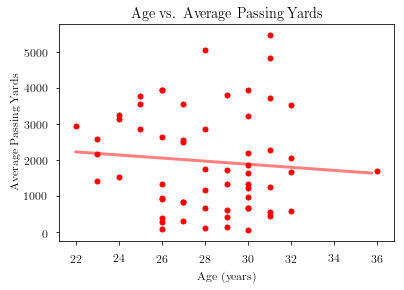

In [32]:
def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    return avg


def linear_regression (x, y):
    
    if (len(x) != len(y)):
        return None
    
    a_x =  average_value (x)
    a_y =  average_value (y)
    s_x =  std_deviation (x)
    s_y =  std_deviation (y)
    m_x =  second_moment (x)
    m_y =  second_moment (y)
    
    
    p = []
    for i in range(0, len(x)):
        p.append(float(x[i])*float(y[i]))
    a_p = average_value (p)
    
    ##linear correlation coefficient
    r = (a_p - a_x*a_y) / np.sqrt ( (m_x-a_x*a_x) * (m_y-a_y*a_y) )
    
    
    ##best fit
    beta = r * s_y / s_x
    alpha = a_y - beta * a_x
    
    
    return alpha, beta, r
                
#     totYards = 0
                
#     if numbers != []:
#         totYards += max(numbers)

#     return totYards

def buildHeightGraph(begin_year, end_year, QB, list_players, choice):
    
    y = []
    x = []
    newxANDy = []
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]

        names = []
    else:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        
        x = []
        for i in days:
            x+=[i]
    
    
    area = np.pi*3
    
    colors = (0,0,0)
    
#     fig, ax = plt.subplots()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    print("R value is: ", r_value, " P value is: ",p_value, " Slope ", slope, "Standard error", std_err)
    print()

    if choice == 1:        
        plt.plot(x,y, marker='o', color ='blue', markersize=5, linewidth=0)
        best_fit_x = np.arange(min(x), max(x), (max(x) - min(x)) / 10.0)
        best_fit_y = intercept + slope * best_fit_x
        plt.plot(best_fit_x, best_fit_y, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
    else:
        plt.plot(x,y, marker='o', color ='red', markersize=5, linewidth=0)
        best_fit_x = np.arange(min(x), max(x), .25)
        best_fit_y = intercept + slope * best_fit_x
        plt.plot(best_fit_x, best_fit_y, color ='red', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
        
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
        
###########Give each point a label
#     for i, txt in enumerate(names):
#         ant = ax.annotate(txt, (x[i], y[i]))
#         ant = ant.set_visible(False)
    it = 0
#     if match.isEmpty()==False:
#         for i in match:
#             plt.annotate(match[i], # this is the text
#                          (labelx[it],labely[it]), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='left') # horizontal alignment can be left, right or center
#             it += 1
    if choice == 1:
        plt.title('Height to average yard thrown')
        plt.xlabel('Height')
        plt.ylabel('Average Yards')
        
    else:
        plt.title('Age vs. Average Passing Yards')
        plt.xlabel('Age (years)')
        plt.ylabel('Average Passing Yards')
    plt.show()
    
buildHeightGraph(begin_year, end_year, QB, list_players,0)

### Analysis
The scatter plot for the age of QB's is found to have a weak negative linear regression. With a negative value of .07847, this means there is not strong indication of correlation among the age and the average passing yards a QB throws. The minimum age is 22 and the max is 36. Most of the data points are not compacted around a certain area, but rather spread out. This large spread is what is evening out the linear regression line.

<center><h2>Histogram #1- Total Average Passing Yards from Player Height
</h2>

Sleep for  2.9221866204135694  seconds
#Download link : https://www.pro-football-reference.com//players/S/SudfNa00.htm
6-6
78
Nate Sudfeld
1993-10-07
{156: 0, 22: 0, 134: 0}
78.0
[78.0, 'Nate Sudfeld', 78, '1993-10-07']
Sleep for  0.38435423451296824  seconds
#Download link : https://www.pro-football-reference.com//players/G/GrayGa00.htm
6-2
74
Garrett Grayson
1991-05-29
{}
0
[0, 'Garrett Grayson', 74, '1991-05-29']
Sleep for  1.6640446021576945  seconds
#Download link : https://www.pro-football-reference.com//players/W/WilsTy00.htm
6-2
74
Tyler Wilson
1989-08-16
{}
0
[0, 'Tyler Wilson', 74, '1989-08-16']
Sleep for  2.9458445088067284  seconds
#Download link : https://www.pro-football-reference.com//players/K/KaayBr00.htm
6-4
76
Brad Kaaya 
1995-09-03
{}
0
[0, 'Brad Kaaya ', 76, '1995-09-03']
Sleep for  2.9392097339795438  seconds
#Download link : https://www.pro-football-reference.com//players/W/WentCa00.htm
6-5
77
Carson Wentz 
1992-12-30
{3296: 0, 3074: 0, 14191: 0, 3782: 0, 4039: 0

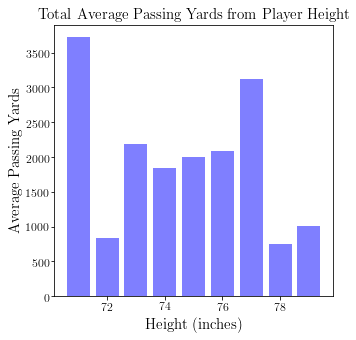

In [27]:
def buildHeightGraph(begin_year, end_year, QB, list_players, choice):
    
    y = []
    x = []
    newxANDy = []
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        print(match)
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]

        names = []
    else:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        print(days)
        
        x = []
        for i in days:
            x+=[i]
    
    
    area = np.pi*3
    noDup = list(set(x))
    colors = (0,0,0)
    
    
    mainList = []
    xyList = [(x[i], y[i]) for i in range(0, len(x))]
    print(xyList)
    mainList = []
    print(xyList)
    sumHeight=0
    count=0
    sumDict={}
    for i in noDup:
        sumTemp = 0
        count = 0
        for a in xyList:
            print(a[1])
            if i ==a[0]:
                sumTemp += a[1]
                count += 1
        sumDict[i] = sumTemp/count
    #print(sumDict)
    
    
    xAxis=[]
    yAxis=[]
    for x in sumDict:
        xAxis.append(x)
        print(x)
    #print(xAxis)

    for a in sumDict.values():
        yAxis.append(a)
        print(a)

  
    plt.figure(figsize=(5,5))
    plt.rc('text', usetex=True)
    plt.rc('font', size=12, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
    plt.rcParams['xtick.major.pad'] = 1
    plt.rcParams['ytick.major.pad'] = 1


    title = 'Total Average Passing Yards from Player Height'
    plt.title(title, fontsize = 15)

    plt.bar(xAxis, yAxis, color = 'blue', align='center', alpha=0.5)
    plt.xlabel('Height (inches)', size=15)
    plt.ylabel('Average Passing Yards', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.show()

      
buildHeightGraph(begin_year, end_year, QB, list_players,1)

### Analysis


The histogram shows a weak relationship between the total average passing yards and the increase height of players. Each height represents a bin with an average value for yards. In the past 9 years, the histogram shows that 71-inch quarterbacks throw on average more passing yards than taller quarterbacks with a substantial difference. In conclusion, the increase in the height of players to total passing yards does not have a strong relationship.

# Histogram #2- Probability distribution of Player Age
In order to build this Histogram we took every Quarterback from the 2011-2019 draft and determined the probabilty distribution of the players age.

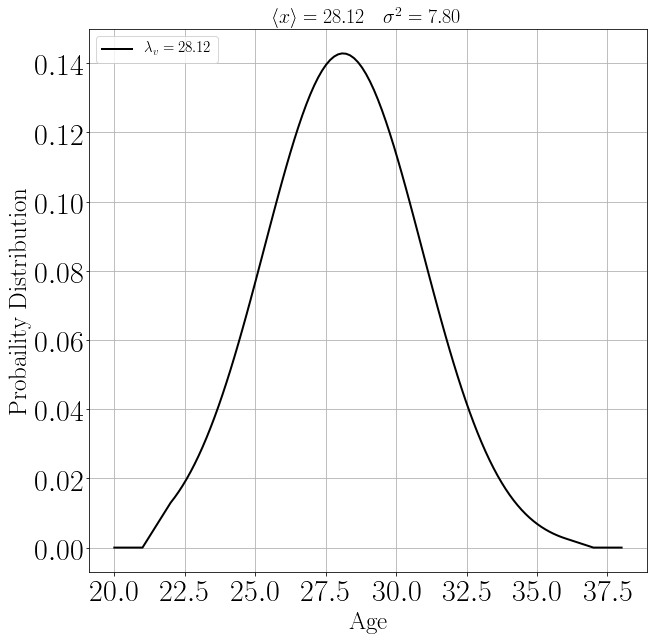

In [30]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import pandas as pd
import seaborn
from scipy.stats import poisson,skellam
import scipy.stats

from datetime import date

list_draft=[]
list_players = []
newlist=[]
QB=[]
begin_year, end_year = 2011, 2020

for year in range (begin_year, end_year, 1):
    #tmp = random.random()*5.0
    #print ('Sleep for ', tmp, ' seconds')
    #time.sleep(tmp)

    ##download
    url = 'https://www.pro-football-reference.com//years/'+str(year)+'/draft.htm'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
                #filehandle = urllib.request.urlopen(url)
                #html = filehandle.read()
  

    
    soup = BeautifulSoup(html, 'lxml')
    player = soup.find_all('td', attrs={'data-stat' : 'player'})
    draftPlayer = soup.find_all('td', attrs={'data-stat' : 'pos'})
    
    for i in draftPlayer:
        tt = format(str(i))
        aa= tt.split('>')
        list_draft.append(aa[1])
        
      
    for row in player:
        col = row.find_all('a')
        newy = format(str(col))
        newplayer= newy.split('"')
        x = newplayer
        #print(x[1])
        list_players.append((x[1]))
    merged_list = list(map(lambda x, y:(x,y), list_players, list_draft))
    #merged_list = tuple(zip(list_players, list_draft))  
    for i in merged_list:
        
        if "QB" in i[1]:
            newlist.append(i)
    for i in newlist:
        QB.append(i[0])
        QB = list(dict.fromkeys(QB))
            
            
def download_and_parse_draft (player_url):
    ##download
    # Grabbing information from the nfl draft first picks fir a given
    tmp = random.random()*3.0
    time.sleep(tmp)
    url = 'https://www.pro-football-reference.com/'+str(player_url)
   
    #Displays what the link is
   
    #Recommended using Mozilla/5.0 in class
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
   
    #Reads the HTML from the url we semt a request to
    html = urlopen(req).read()

    #save a player's HTML to disk. This was provided in class
    #create a text file for the individula player. Since we are updating the important information into data.txt, there is no
    #need to make an html file holder for every player
    f = open('player.html','w')
    f.write(html.decode('utf-8'))
    f.close()
 
    ####################### Begin parsing###############
    soup = BeautifulSoup(html, 'lxml')
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    player = name.get_text()
    
     #QB Height Parse
    heightList=[]
    secondHeightList=[]
    height = soup.find_all('span', attrs={'itemprop' : 'height'})
    heightSplit = format(str(height))
    newHeight= heightSplit.split('</span>')
    heightList.append(newHeight[0])
    for i in heightList:
        secondHeight = i.split(">")
    secondHeightList.append(secondHeight[1])
    heightDone = "".join(secondHeightList)
    
    heightInchesLst = []
    heightInches = 0
    
    if len(heightDone) == 3:
        heightInches = (12 * int(heightDone[0])) + int(heightDone[2])
    elif len(heightDone) == 4:
        heightInches = (12 * int(heightDone[0])) + (10 + int(heightDone[3]))
        
    #QB Name Parse
    nameList=[]
    secondNameList=[]
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    nameSplit = format(str(name))
    newName= nameSplit.split('</h1>')
    nameList.append(newName[0])
    for i in nameList:
        secondName = i.split(">")
    secondNameList.append(secondName[1])
    nameDone = "".join(secondNameList)
    
    #QB Age Parse
    ageList=[]
    secondAgeList=[]
    age = soup.find('span', attrs={'itemprop' : 'birthDate'})
    ageSplit = format(str(age))
    newAge= ageSplit.split('data-birth="')
    ageList.append(newAge[1])
    for i in ageList:
        secondAge = i.split('" id')
    secondAgeList.append(secondAge[0])
    ageDone = "".join(secondAgeList)
   
    passingYards = soup.find_all('td', attrs={'data-stat' : 'pass_yds'})
    
    count = 1
    
    ad = []
    numbers = {}
    
    for i in passingYards:
        newPY = format(str(i))
        spnewPY = newPY.split(">")
        for j in spnewPY:
            spJ = j.split("<")
            ad += spJ
        for j in ad:
            if j. isdigit():
                numbers[int(j)] = 0    
    numbersMinusMax = {}
    
    for i in numbers:
        if numbers != {}:
            if i != max(numbers):
                if i != 0:
                    numbersMinusMax[i] = 0
    avg = findAverage(numbersMinusMax)

    return [avg, nameDone, heightInches, ageDone]
    

def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    return avg

def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance
#####################################

def buildHeightGraph(begin_year, end_year, QB, list_players, choice, choice2):
    
    y = []
    x = []
    xAxis=[]
    yAxis=[]
    newxANDy = []
    
    pdf = {}
    av= 0
    Px = []
    var = 0
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]
            
    elif choice == 2:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        
        x = []
        for i in days:
            x+=[i]
    #Build histogram
    if choice2 ==1 or choice2 ==2:
        area = np.pi*3
        noDup = list(set(x))
        colors = (0,0,0)


        mainList = []
        xyList = [(x[i], y[i]) for i in range(0, len(x))]
        mainList = []
        sumHeight=0
        count=0
        sumDict={}
        for i in noDup:
            sumTemp = 0
            count = 0
            for a in xyList:
                if i ==a[0]:
                    sumTemp += a[1]
                    count += 1
            sumDict[i] = sumTemp/count

        for x in sumDict:
            xAxis.append(x)

        for a in sumDict.values():
            yAxis.append(a)
        
    elif choice2 ==3:

        pdf, av, var = measure_probability_distribution(x)
        x = []
        Px = []
        for q in sorted(pdf):
            x.append(q)
            Px.append(pdf[q])


#     fig, ax = plt.subplots()
   
#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####

#####################################

###########Give each point a label
#     for i, txt in enumerate(names):
#         ant = ax.annotate(txt, (x[i], y[i]))
#         ant = ant.set_visible(False)


            
    plt.figure(figsize=(10,10))
    plt.rc('text', usetex=True)
    plt.rc('font', size=12, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
    plt.rcParams['xtick.major.pad'] = 1
    plt.rcParams['ytick.major.pad'] = 1

    if choice2==1:
        title = 'Height to Average Yard Thrown'
        plt.title(title, fontsize = 20)
        plt.bar(xAxis, yAxis, color = 'red', align='center', alpha=0.5, label = 'visitors')
        plt.xlabel('Height', size=12)
        plt.ylabel('Average Yards', size=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
    elif choice2==2:
        title = 'Age to Average Yard Thrown'
        plt.title(title, fontsize = 20)
        plt.bar(xAxis, yAxis, color = 'red', align='center', alpha=0.5, label = 'visitors')
        plt.xlabel('Age', size=12)
        plt.ylabel('Average Yards', size=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
    elif choice2 == 3:
        title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
        plt.title(title, fontsize = 20)
        
        x.sort()
                
        plt.xlabel('Age', size=25)
        plt.ylabel('Probaility Distribution', size=25)
        plt.xticks(size=30)
        plt.yticks(size=30)
        plt.rcParams['xtick.major.pad'] = 8
        plt.rcParams['ytick.major.pad'] = 8
        
        y = []
        
        for i in np.linspace(min(x)-2,min(x)-1, 10):
            y+=[0]
        
        y1 = np.linspace(min(x), max(x), 100)
        for i in scipy.stats.norm.pdf(y1,av,math.sqrt(var)):
            y += [i]
            
        for i in np.linspace(max(x)+1,max(x)+2, 10):
            y+=[0]
#         y+=[0]
#         y+=[0]
        
        x1 = []
        for i in np.linspace(min(x)-2,min(x)-1, 10):
            x1+=[i]
            
        for i in np.linspace(min(x), max(x), 100):
            x1+=[i]
            
        for i in np.linspace(max(x)+1,max(x)+2, 10):
            x1+=[i]
#         x1+=[max(x)+1]
#         x1+=[max(x)+2]

                
        plt.grid()

        plt.plot(x1, y, linestyle='-', linewidth=2.0, color='k', label='$\lambda_v = '+'%.2f' % av+'$')
        
        plt.legend(loc=2, numpoints=1, prop={'size':15})

    plt.show()

#Choice(we use this for the scatter plots): 1 = Height information, 2 = Age information
#Choice2(we use this for the histogram plots): 0 = no histogram, 1 = Height information, 2 = Age information
buildHeightGraph(begin_year, end_year, QB, list_players,2,3)

### Analysis 
Upon further investigation, we decided that the poisson distribution was the incorrect way to represent our data set since there was no event that we could measure with the age. This is why then generated a normal distribution to dsiplay the amount of people within a given age group. The mean and std is still correct but gives a better visual representation when we use the normal distribution.

From this information we can gather that the age group for quarterbacks are normally distributed. The mode of the age groups is 30. If you look at the title on the top of the graph we also determined that the mean age is 28.08 with a variance of 7.91. By taking the square root of the variance we can determine that the standard deviation of the graph is 2.812472222. The standard deviation for the age group is rather low. Meaning 68% of the total Quarterbacks are roughly between the age of 27 and 33.

# Cumulative Probability Line Graph
For this graph we looked at the total age groups of Quarterbacks drafted since 2011 with each of their probality of the total amount of yards on average they have thrown, at or below their age group.

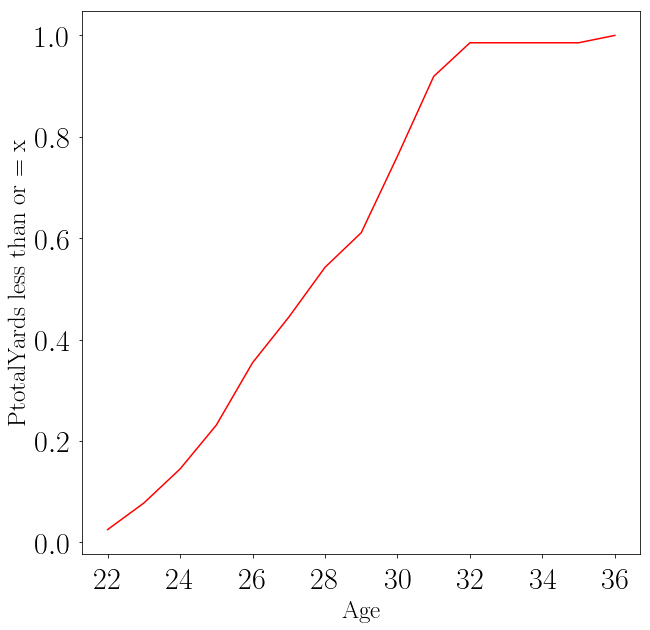

In [31]:
def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    return avg

def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance
#####################################

def buildHeightGraph(begin_year, end_year, QB, list_players, choice, choice2):
    
    y = []
    x = []
    
    x1 = []
    x2 = []
    
    xAxis=[]
    yAxis=[]
    newxANDy = []
    
    pdf = {}
    av= 0
    Px = []
    var = 0
    
    pdf1 = {}
    av1= 0
    Px1 = []
    var1 = 0
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]
            
    elif choice == 2:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        
        x = []
        for i in days:
            x+=[i]
    #Build histogram
    if choice2 ==1 or choice2 ==2:
        area = np.pi*3
        noDup = list(set(x))
        colors = (0,0,0)


        mainList = []
        xyList = [(x[i], y[i]) for i in range(0, len(x))]
        mainList = []
        sumHeight=0
        count=0
        sumDict={}
        for i in noDup:
            sumTemp = 0
            count = 0
            for a in xyList:
                if i ==a[0]:
                    sumTemp += a[1]
                    count += 1
            sumDict[i] = sumTemp/count

        for x in sorted(sumDict):
            xAxis.append(x)
            yAxis.append(sumDict[x])
        
    elif choice2 ==3:            

        pdf, av, var = measure_probability_distribution(x)
        x = []
        Px = []
        for q in sorted(pdf):
            x.append(q)
            Px.append(pdf[q])

    if choice2 ==4:
        
        maxAge = max(x)
        minAge = min(x)
        x1 = []
        
        j = minAge
        ageSum = {}
        
        while  j <= maxAge:
            s = 0
            i = 0
            while i < len(x):
                if int(x[i]) == j:
                    s += y[i]
                i += 1
            ageSum[j] = s
            j += 1
        
        PxD = {}
        xtemp = []
        ytemp = []
        for g in sorted(ageSum):
            xtemp += [g]
            ytemp += [ageSum[g]]
        
        i = 0
        
        while i < len(xtemp):
            s = 0
            t = 0
            while t <= i:
                s += ytemp[t]
                t+=1
            PxD[xtemp[i]] = s/sum(ytemp)
            i += 1

        x = []
        Px = []
        for i in sorted(PxD):
            Px += [PxD[i]]
            x += [i]
            

#         pdf, av, var = measure_probability_distribution(x1)
#         pdf1, av1, var1 = measure_probability_distribution(x2)
        
#         x = []
#         Px = []
#         for q in sorted(pdf):
#             x.append(q)
#             Px.append(pdf[q])
            
#         x1 = []
#         Px1 = []
#         for q in sorted(pdf1):
#             x1.append(q)
#             Px1.append(pdf[q])
#     fig, ax = plt.subplots()
   
#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####

#####################################

###########Give each point a label
#     for i, txt in enumerate(names):
#         ant = ax.annotate(txt, (x[i], y[i]))
#         ant = ant.set_visible(False)


            
    plt.figure(figsize=(10,10))

    if choice2==1:
        title = 'Height to Average Yard Thrown'
        plt.title(title, fontsize = 20)
        plt.bar(xAxis, yAxis, color = 'red', align='center', alpha=0.5, label = 'visitors')
        plt.xlabel('Height', size=12)
        plt.ylabel('Average Yards', size=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
    elif choice2==2:
        title = 'Age to Average Yard Thrown'
        plt.title(title, fontsize = 20)
        plt.bar(xAxis, yAxis, color = 'red', align='center', alpha=0.5, label = 'visitors')
        plt.xlabel('Age', size=12)
        plt.ylabel('Average Yards', size=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
    elif choice2 == 3:
        title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
        plt.title(title, fontsize = 20)
        
        x.sort()
                
        plt.xlabel('Age', size=25)
        plt.ylabel('Probaility Distribution', size=25)
        plt.xticks(size=30)
        plt.yticks(size=30)
        plt.rcParams['xtick.major.pad'] = 8
        plt.rcParams['ytick.major.pad'] = 8
        
        plt.bar(x, Px, color = 'red', align='center', alpha=0.5, label = 'QB')

        
        plt.plot(x, poisson.pmf(x, av), linestyle='-', linewidth=2.0, color='k', label='$\lambda_v = '+'%.2f' % av+'$')
        
        plt.legend(loc=2, numpoints=1, prop={'size':15})
    elif choice2 == 4:
        
            plt.xlabel('Age', size=25)
            plt.ylabel('PtotalYards less than or = x', size=25)
            plt.xticks(size=30)
            plt.yticks(size=30)

            plt.plot(x, Px, color = 'red')

 
    plt.show()

#Choice(we use this for the scatter plots): 1 = Height information, 2 = Age information
#Choice2(we use this for the histogram plots): 0 = no histogram, 1 = Height information, 2 = Age information
buildHeightGraph(begin_year, end_year, QB, list_players,2,4)

### Analysis
From this graph we can see for each age group the amount of average yards that they have contributed to the overrall yards thrown on average. We took the total of every players average yards and found the age for each member. Took the average yards they had thrown in their career and divided it by the total average yards thrown from all player. We took the sum of each player's average yards thrown and made the cummulative probabilty off of it.

# Conclusion
The breakdown for this project is about what we expected when going in. Many of the players had similar height and age as each other when starting out. Much of the data was condensed into just a few groups for height since most of the Quarterbacks hired into the NFL are meant to be tall. By allowing time to pass we were able to get a bigger group for age than what we would have gotten for a single year. Almost all of the people who are drafted are right out of college and are within the 22-24 range. By taking the age over many years we were able to look at a bigger spread of age groups to find if there is a correlation between the average yards they could throw per year and the player getting older. 

For possible future analysis we would like to find information about the running back for the quarterback's team. Although we measured the average passing yards, that does not necessarily mean that the QB is overall better. If a running back on his team is getting more than enough yards to reach the 1st down, then there isn't a reason to keep risking the throws. We could check to see how well the running back does on average and find out if that creates less passing yards, or they just get more yards overall from passing and running as a team.